# Exploring Text Data

Consumer Complaint Database from Consumer Financial Protection Bureau

# Setup Dependencies

In [54]:
# dependencies
import numpy as np
import pandas as pd

# VISUALIZATION
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno

# NLP
from wordcloud import WordCloud
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sqlalchemy import (create_engine, MetaData)

# Load the data


In [55]:
DATA_PATH = '../data/consumer_complaints.csv'

In [56]:
df = pd.read_csv(DATA_PATH)

/Users/deniel.horvatic/repository/machine-learning-masterclass/project_16_call_center_nlp/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
# Just take a sample size of 100000
df = df.sample(n=100000, random_state=1)

In [58]:
df.shape

(100000, 18)

In [61]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [62]:
# As further information
# Merge Example 
# df = pd.merge(df_articles, df_comments, on='articleID', how='inner',sort=False)

In [63]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
569979,12/12/2016,Credit reporting,NaN,Incorrect information on credit report,Account terms,NaN,NaN,"EQUIFAX, INC.",OR,97266,NaN,Consent not provided,Web,12/12/2016,Closed with explanation,Yes,Yes,2244956
500679,04/03/2017,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,KEYCORP,NE,680XX,NaN,Consent not provided,Web,04/03/2017,Closed with explanation,Yes,Yes,2417273
1251934,01/22/2012,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95688,NaN,NaN,Referral,01/24/2012,Closed without relief,Yes,Yes,16073
1119247,08/06/2013,Money transfers,Domestic (US) money transfer,Other service issues,NaN,NaN,NaN,"WESTERN UNION COMPANY, THE",GA,30310,NaN,NaN,Phone,08/09/2013,Closed with monetary relief,Yes,No,481314
656597,07/08/2016,Bank account or service,Checking account,"Account opening, closing, or management",NaN,I opened a new citigold checking account aroun...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,310XX,NaN,Consent provided,Web,07/08/2016,Closed with non-monetary relief,Yes,No,2002899


In [64]:
df.tail(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
593097,10/27/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,"Following a period of financial difficulty, my...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,OH,436XX,NaN,Consent provided,Web,10/27/2016,Closed with explanation,Yes,No,2182807
61826,12/28/2018,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,i was charged an annual fee end of XXXX on a f...,NaN,AMERICAN EXPRESS COMPANY,NY,109XX,NaN,Consent provided,Web,12/28/2018,Closed with explanation,Yes,NaN,3111468
326943,12/15/2017,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,AFNI INC.,OH,45322,NaN,Consent not provided,Web,12/15/2017,Closed with explanation,Yes,NaN,2756695
1135154,06/12/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,GA,30013,NaN,NaN,Referral,06/13/2013,Closed with explanation,Yes,No,430726
977131,08/12/2014,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,JPMORGAN CHASE & CO.,FL,33168,NaN,NaN,Fax,08/19/2014,Closed with explanation,Yes,Yes,979550


---
# Clean Table Creation
## Clean table Header

In [65]:
df.columns.values

array(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags',
       'Consumer consent provided?', 'Submitted via',
       'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype=object)

In [66]:
header = {
    'Date received': 'date_received',
    'Product': 'product',
    'Sub-product':'sub_product',
    'Issue':'issue',
    'Sub-issue':'sub_issue',
    'Consumer complaint narrative':'consumer_complaint_narrative',
    'Company public response':'company_public_response',
    'Company':'company',
    'State':'state',
    'ZIP code':'zip_code',
    'Tags':'tags',
    'Consumer consent provided?':'is_consumer_consent_provided',
    'Submitted via':'submittted_via',
    'Date sent to company':'date_sent_to_company',
    'Company response to consumer':'company_response_to_consumer',
    'Timely response?':'timely_response',
    'Consumer disputed?':'consumer_disputed',
    'Complaint ID':'complaint_id',
}

In [69]:
clean_table = df.copy()

In [70]:
clean_table = clean_table.rename(columns = header)
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
569979,12/12/2016,Credit reporting,NaN,Incorrect information on credit report,Account terms,NaN,NaN,"EQUIFAX, INC.",OR,97266,NaN,Consent not provided,Web,12/12/2016,Closed with explanation,Yes,Yes,2244956
500679,04/03/2017,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,KEYCORP,NE,680XX,NaN,Consent not provided,Web,04/03/2017,Closed with explanation,Yes,Yes,2417273
1251934,01/22/2012,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95688,NaN,NaN,Referral,01/24/2012,Closed without relief,Yes,Yes,16073
1119247,08/06/2013,Money transfers,Domestic (US) money transfer,Other service issues,NaN,NaN,NaN,"WESTERN UNION COMPANY, THE",GA,30310,NaN,NaN,Phone,08/09/2013,Closed with monetary relief,Yes,No,481314
656597,07/08/2016,Bank account or service,Checking account,"Account opening, closing, or management",NaN,I opened a new citigold checking account aroun...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,310XX,NaN,Consent provided,Web,07/08/2016,Closed with non-monetary relief,Yes,No,2002899


---
# Enrich table with features
We need a column with coversions with zero or one as values for testing purposes. Not part of the original dataset. 

In [71]:
clean_table['conversion'] = np.random.randint(0, 2, clean_table.shape[0])
clean_table['conversion'].head()

569979     0
500679     0
1251934    0
1119247    0
656597     0
Name: conversion, dtype: int64

We need a column with agent ids

In [72]:
clean_table['agent_id'] = np.random.randint(0, 50, clean_table.shape[0])
clean_table['agent_id'].head()

569979     32
500679     33
1251934    47
1119247    25
656597      8
Name: agent_id, dtype: int64

## Encode dummy variables for product 

In [78]:
product_table = pd.get_dummies(clean_table, columns=["product"])
product_table.head()

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,...,"product_Money transfer, virtual currency, or money service",product_Money transfers,product_Mortgage,product_Other financial service,product_Payday loan,"product_Payday loan, title loan, or personal loan",product_Prepaid card,product_Student loan,product_Vehicle loan or lease,product_Virtual currency
569979,12/12/2016,NaN,Incorrect information on credit report,Account terms,NaN,NaN,"EQUIFAX, INC.",OR,97266,NaN,...,0,0,0,0,0,0,0,0,0,0
500679,04/03/2017,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,KEYCORP,NE,680XX,NaN,...,0,0,0,0,0,0,0,0,0,0
1251934,01/22/2012,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95688,NaN,...,0,0,1,0,0,0,0,0,0,0
1119247,08/06/2013,Domestic (US) money transfer,Other service issues,NaN,NaN,NaN,"WESTERN UNION COMPANY, THE",GA,30310,NaN,...,0,1,0,0,0,0,0,0,0,0
656597,07/08/2016,Checking account,"Account opening, closing, or management",NaN,I opened a new citigold checking account aroun...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,310XX,NaN,...,0,0,0,0,0,0,0,0,0,0


# Standard Analysis - Numerical Values

In [79]:
# Not useful because we have no numeric values except the complaint_id
clean_table.describe()

,complaint_id,conversion,agent_id
count,1.000000e+05,100000.000000,100000.00000
mean,1.900716e+06,0.500600,24.47460
std,9.557954e+05,0.500002,14.39316
min,5.000000e+00,0.000000,0.00000
25%,1.102394e+06,0.000000,12.00000
50%,2.080316e+06,1.000000,24.00000
75%,2.768854e+06,1.000000,37.00000
max,3.205111e+06,1.000000,49.00000


In [80]:
product_table.describe()

,complaint_id,conversion,agent_id,product_Bank account or service,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",...,"product_Money transfer, virtual currency, or money service",product_Money transfers,product_Mortgage,product_Other financial service,product_Payday loan,"product_Payday loan, title loan, or personal loan",product_Prepaid card,product_Student loan,product_Vehicle loan or lease,product_Virtual currency
count,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.900716e+06,0.500600,24.47460,0.070210,0.030730,0.025270,0.070460,0.036960,0.112850,0.168140,...,0.007950,0.004690,0.21762,0.000730,0.004080,0.00671,0.002900,0.040040,0.008730,0.000030
std,9.557954e+05,0.500002,14.39316,0.255502,0.172586,0.156945,0.255922,0.188665,0.316411,0.373992,...,0.088808,0.068323,0.41263,0.027009,0.063745,0.08164,0.053774,0.196054,0.093026,0.005477
min,5.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.102394e+06,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.080316e+06,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,2.768854e+06,1.000000,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.205111e+06,1.000000,49.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


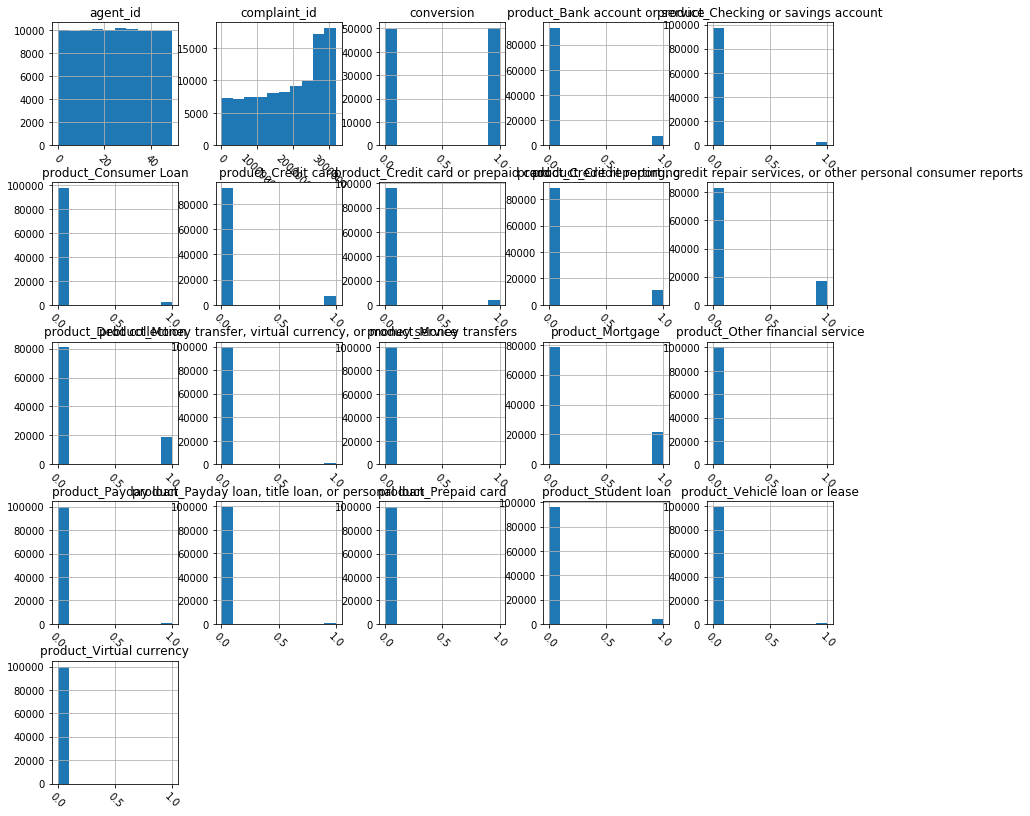

In [81]:
product_table.hist(xrot=-45, figsize=(14,14))
plt.show()

# Standard Analysis - Categorical Values

In [82]:
# display summary statistics for categorial features
clean_table.describe(include=['object'])

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed
count,100000,100000,81261,100000,58008,30119,34818,100000,98520,90944,13570,53865,100000,100000,100000,100000,61324
unique,2675,18,75,161,210,29857,10,2568,62,10707,3,4,6,2570,8,2,2
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,09/08/2017,Closed with explanation,Yes,No
freq,284,21762,16477,9938,4216,67,23961,8954,13587,551,6505,30146,73521,279,77425,97490,49486


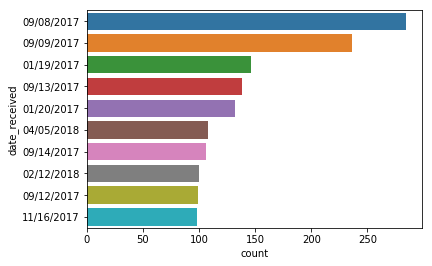

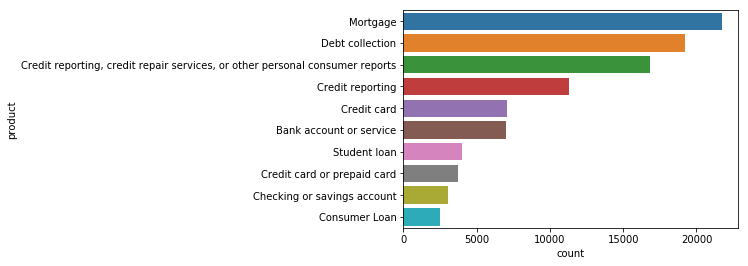

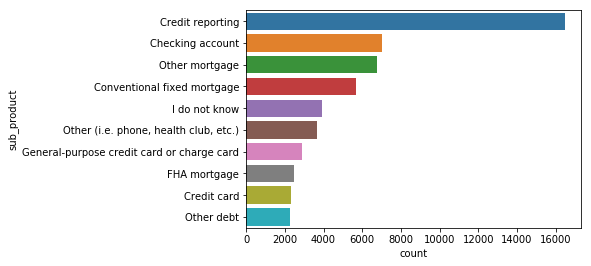

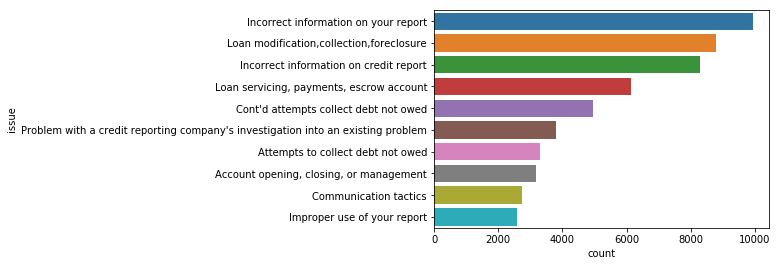

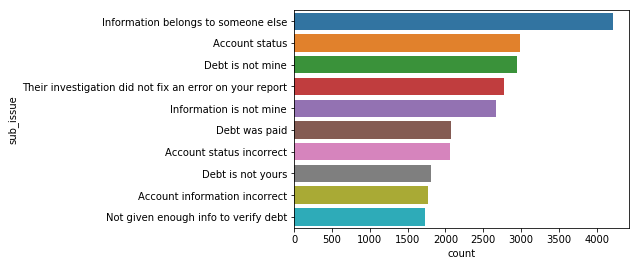

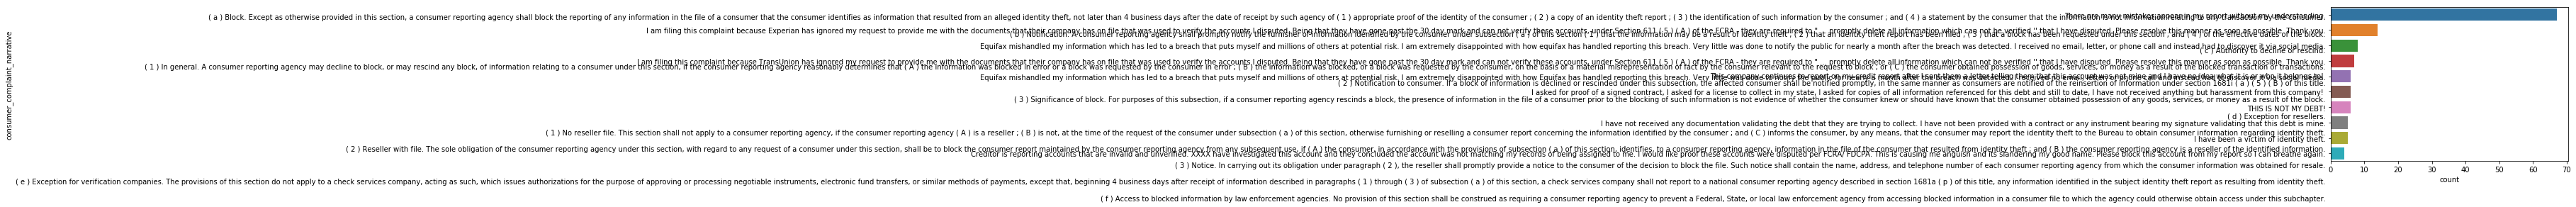

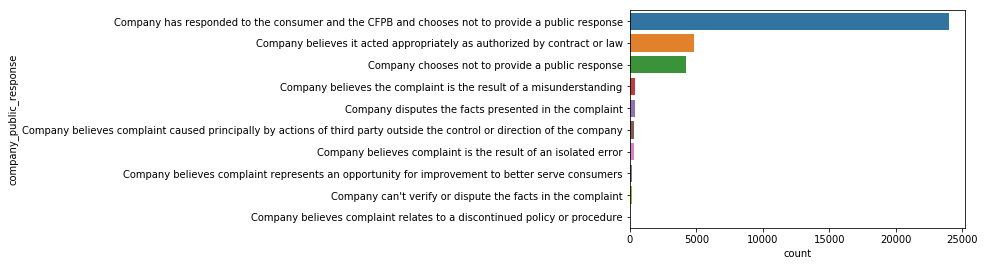

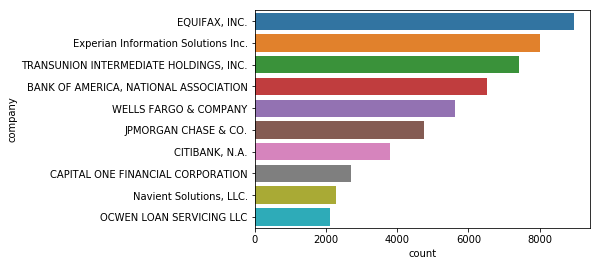

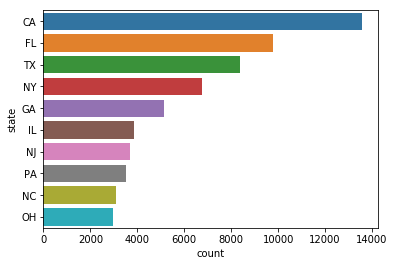

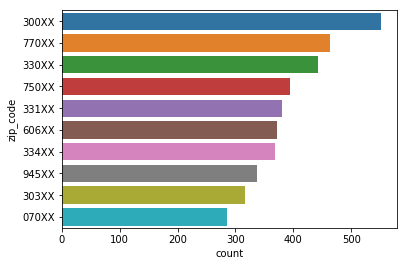

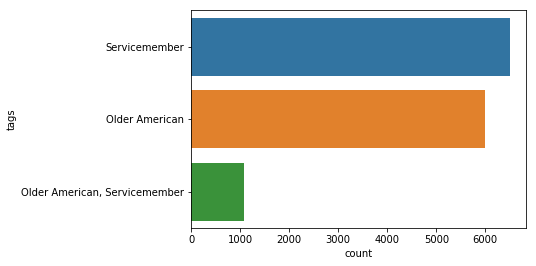

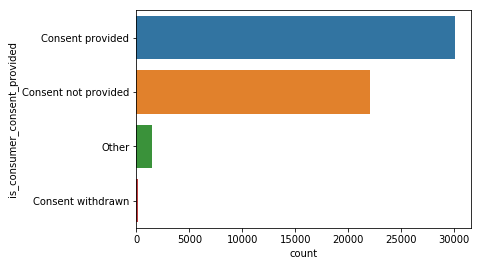

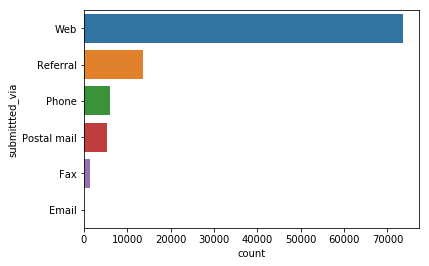

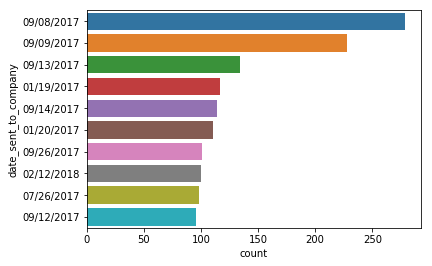

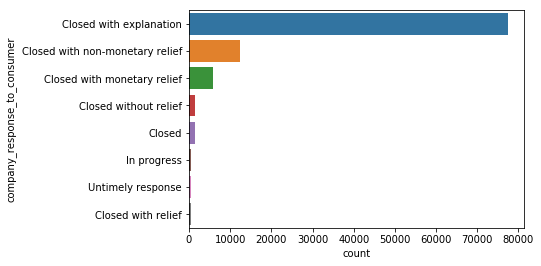

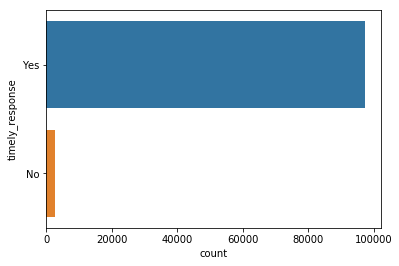

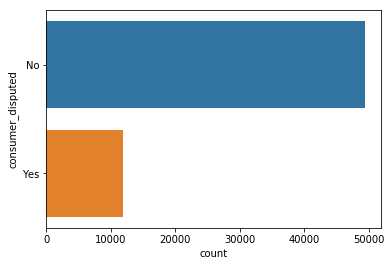

In [83]:
for feature in clean_table.dtypes[clean_table.dtypes == 'object'].index:
    #if(feature == 'consumer_disputed'):
     #   continue
    sns.countplot(y=feature, data=clean_table, 
                  order=clean_table[feature].value_counts().iloc[:10].index)
    plt.show()

# Standard Analysis - Check for segmentations
## Conversions by agent   

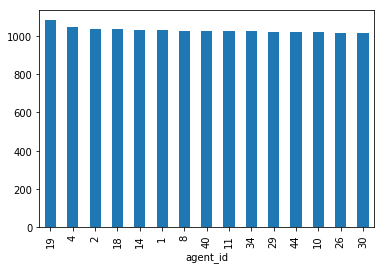

In [85]:
group_by_agent = clean_table.groupby(['agent_id']).sum()
group_by_agent = group_by_agent.sort_values('conversion',ascending=False)
group_by_agent['conversion']
group_by_agent['conversion'][:15].plot.bar()

## Conversions by product

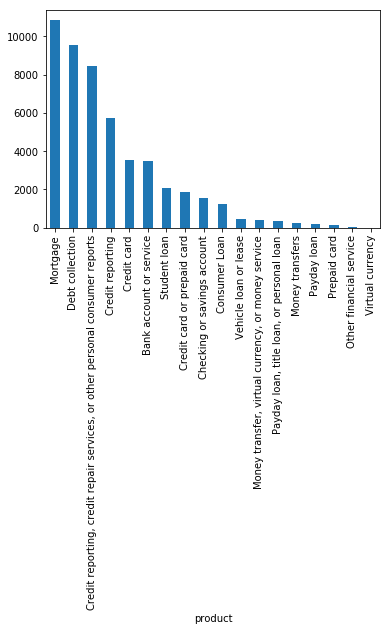

In [86]:
group_by_product = clean_table.groupby(['product']).sum()
group_by_product = group_by_product.sort_values('conversion',ascending=False)
group_by_product['conversion']
group_by_product['conversion'].plot.bar()

# Standard Analysis - Check for correlations (HEATMAP)

In [92]:
correlations = clean_table.corr()

In [93]:
# create a mask with 23,23 dimensionality and trim them from the middle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

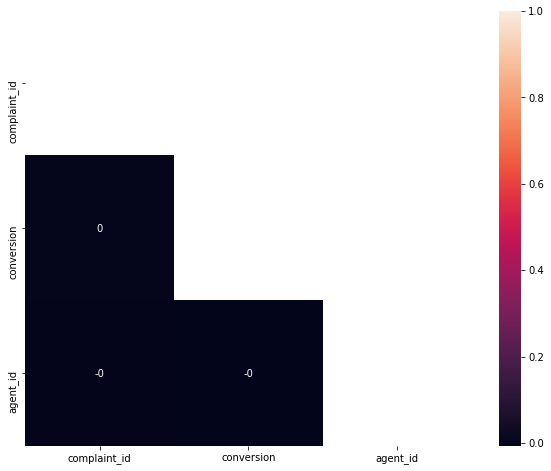

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt='.0f', mask=mask)

---
# Save Clean Table

In [24]:
# clean_table.to_csv('../data/clean_table.csv', index=False)
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id
0,04/08/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,MO,NaN,NaN,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3205347,0,8
1,04/08/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Medical Data Systems, Inc.",PA,180XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3204677,1,5
2,04/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",MD,207XX,Servicemember,NaN,Web,04/08/2019,In progress,Yes,NaN,3205132,0,3
3,04/08/2019,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,NaN,NaN,Company believes it acted appropriately as aut...,"Harpeth Financial Services, LLC",VA,236XX,Servicemember,NaN,Web,04/08/2019,Closed with explanation,Yes,NaN,3204788,0,9
4,04/08/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",WA,985XX,NaN,NaN,Web,04/08/2019,In progress,Yes,NaN,3205284,1,4


# Transform to Excel

In [25]:
# clean_table.to_excel("../data/customer_complaints.xlsx")

---
# Data Cleaning

## Handle missing values

In [95]:
def display_missing_values():
    print( (clean_table.isnull().sum() * 1000 // len(clean_table))/10 )

display_missing_values()

date_received                    0.0
product                          0.0
sub_product                     18.7
issue                            0.0
sub_issue                       41.9
consumer_complaint_narrative    69.8
company_public_response         65.1
company                          0.0
state                            1.4
zip_code                         9.0
tags                            86.4
is_consumer_consent_provided    46.1
submittted_via                   0.0
date_sent_to_company             0.0
company_response_to_consumer     0.0
timely_response                  0.0
consumer_disputed               38.6
complaint_id                     0.0
conversion                       0.0
agent_id                         0.0
dtype: float64


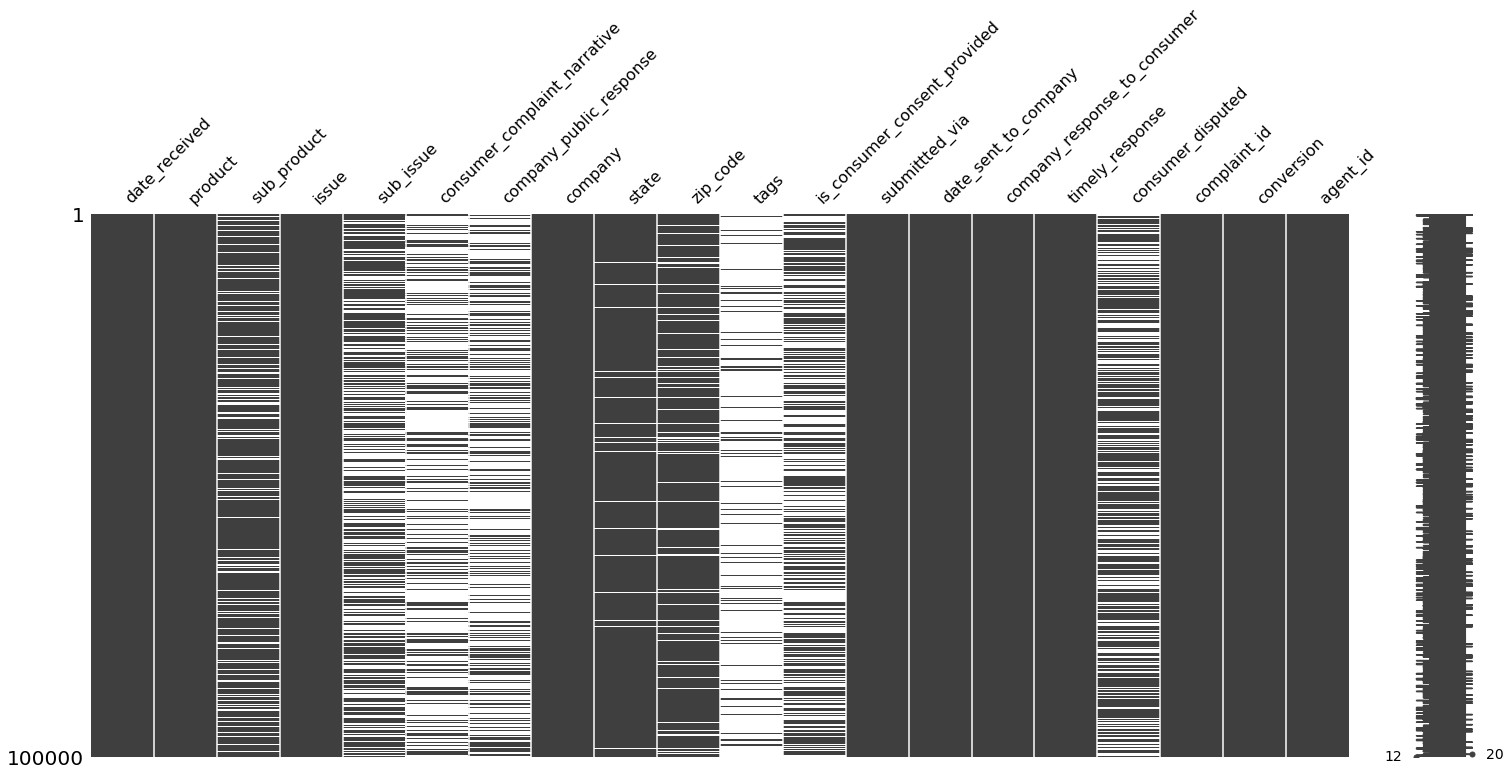

In [96]:
msno.matrix(clean_table)

# Conclusion
A lot of missing data.   
Missing Tags 86% - evaluation if this is really a relevant feature.  

Remove tags
Replace missing   
fields with 'Missing'

# Removing Tags

In [99]:
clean_table = clean_table.drop(['tags'], axis=1)

KeyError: "['tags'] not found in axis"

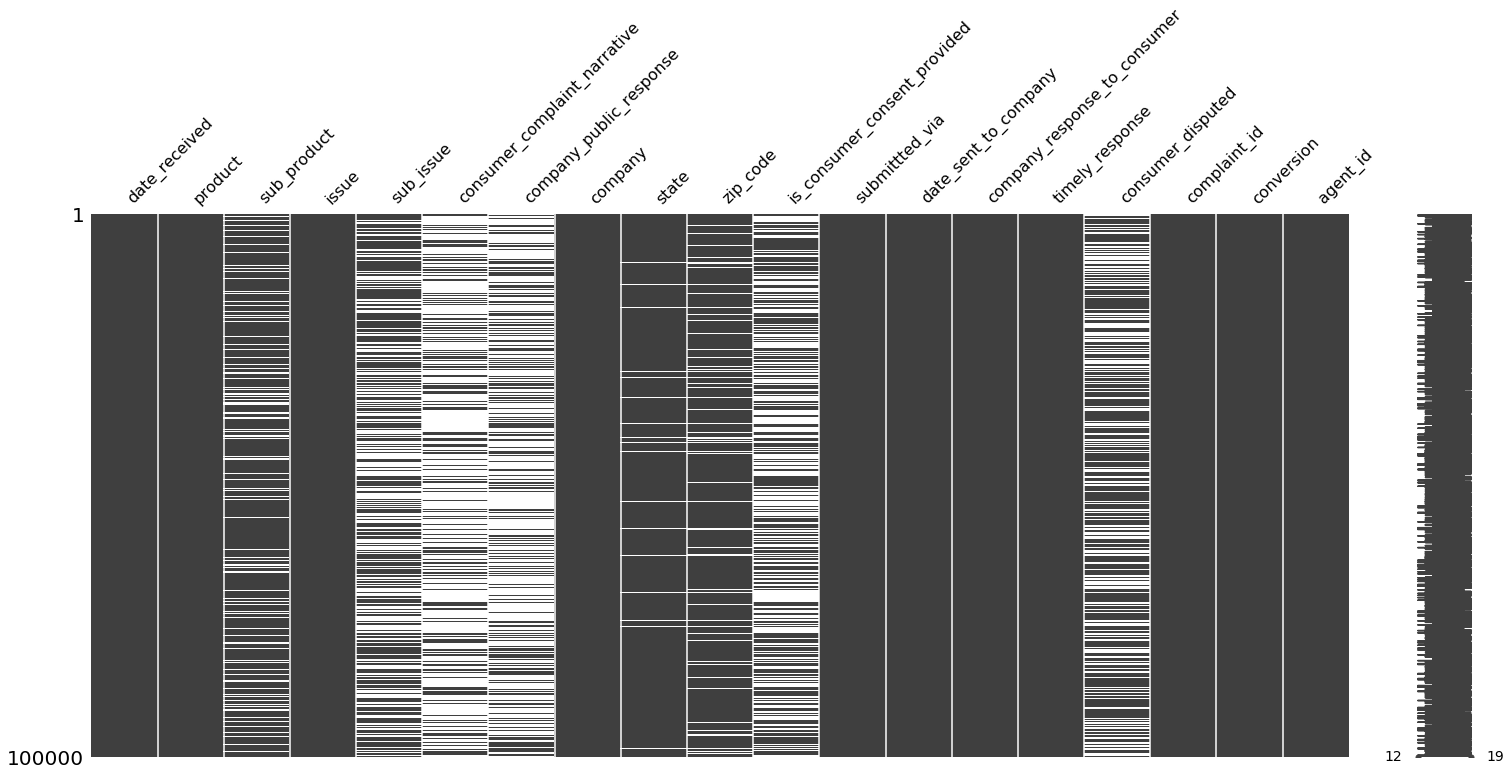

In [101]:
msno.matrix(clean_table)

# Fill missing values

In [102]:
for column in clean_table.select_dtypes(include=['object']):
    clean_table[column] = clean_table[column].fillna('Missing')

display_missing_values()

date_received                   0.0
product                         0.0
sub_product                     0.0
issue                           0.0
sub_issue                       0.0
consumer_complaint_narrative    0.0
company_public_response         0.0
company                         0.0
state                           0.0
zip_code                        0.0
is_consumer_consent_provided    0.0
submittted_via                  0.0
date_sent_to_company            0.0
company_response_to_consumer    0.0
timely_response                 0.0
consumer_disputed               0.0
complaint_id                    0.0
conversion                      0.0
agent_id                        0.0
dtype: float64


# Remove Outlier

In [31]:
# TODO

# Fix Structural Errors

In [32]:
# TODO

# Text preprocessing

In [103]:
text_table = clean_table.copy()
text_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id
569979,12/12/2016,Credit reporting,Missing,Incorrect information on credit report,Account terms,Missing,Missing,"EQUIFAX, INC.",OR,97266,Consent not provided,Web,12/12/2016,Closed with explanation,Yes,Yes,2244956,0,32
500679,04/03/2017,Consumer Loan,Vehicle loan,Managing the loan or lease,Missing,Missing,Missing,KEYCORP,NE,680XX,Consent not provided,Web,04/03/2017,Closed with explanation,Yes,Yes,2417273,0,33
1251934,01/22/2012,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Missing,Missing,Missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95688,Missing,Referral,01/24/2012,Closed without relief,Yes,Yes,16073,0,47
1119247,08/06/2013,Money transfers,Domestic (US) money transfer,Other service issues,Missing,Missing,Missing,"WESTERN UNION COMPANY, THE",GA,30310,Missing,Phone,08/09/2013,Closed with monetary relief,Yes,No,481314,0,25
656597,07/08/2016,Bank account or service,Checking account,"Account opening, closing, or management",Missing,I opened a new citigold checking account aroun...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,310XX,Consent provided,Web,07/08/2016,Closed with non-monetary relief,Yes,No,2002899,0,8


In [104]:
text_table['consumer_complaint_narrative'] = text_table['consumer_complaint_narrative'].replace('Missing','')


In [106]:
transcripts = text_table['consumer_complaint_narrative']

In [107]:
corpus_all_in_one = ' '.join([transcript for transcript in transcripts])
print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Corpus size (char): 32436370


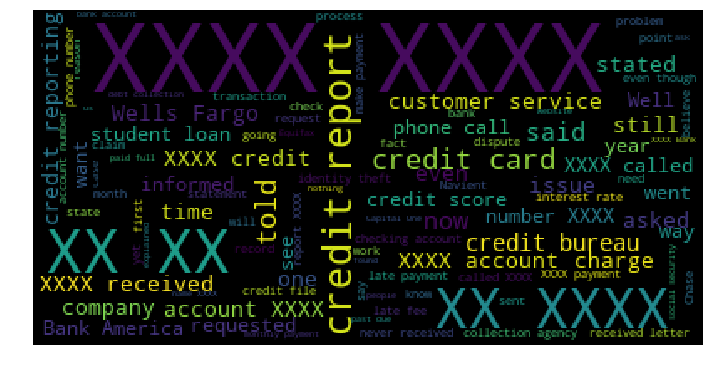

In [108]:
cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [109]:
def display_most_common_words(data):
    stop_list = stopwords.words('english') + list(string.punctuation)

    document_frequency = Counter()

    for content in data:
        #try:  # py3
        tokens = word_tokenize(content)
        #except UnicodeDecodeError:  # py27
        #    tokens = word_tokenize(content.decode('utf-8'))
        unique_tokens = [token.lower() for token in set(tokens)
                         if token.lower() not in stop_list]
        document_frequency.update(unique_tokens)

    for word, freq in document_frequency.most_common(20):
        print("{}\t{}".format(word, freq))

display_most_common_words(transcripts)

xxxx	24084
credit	18698
account	13866
report	10311
would	9761
information	8932
received	8905
company	8094
never	8041
time	7959
told	7662
called	7592
payment	7536
loan	7429
also	7354
bank	7124
sent	7090
n't	7008
debt	6961
xx/xx/xxxx	6833


---
# Feature Engineering

In [110]:
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id
569979,12/12/2016,Credit reporting,Missing,Incorrect information on credit report,Account terms,Missing,Missing,"EQUIFAX, INC.",OR,97266,Consent not provided,Web,12/12/2016,Closed with explanation,Yes,Yes,2244956,0,32
500679,04/03/2017,Consumer Loan,Vehicle loan,Managing the loan or lease,Missing,Missing,Missing,KEYCORP,NE,680XX,Consent not provided,Web,04/03/2017,Closed with explanation,Yes,Yes,2417273,0,33
1251934,01/22/2012,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Missing,Missing,Missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95688,Missing,Referral,01/24/2012,Closed without relief,Yes,Yes,16073,0,47
1119247,08/06/2013,Money transfers,Domestic (US) money transfer,Other service issues,Missing,Missing,Missing,"WESTERN UNION COMPANY, THE",GA,30310,Missing,Phone,08/09/2013,Closed with monetary relief,Yes,No,481314,0,25
656597,07/08/2016,Bank account or service,Checking account,"Account opening, closing, or management",Missing,I opened a new citigold checking account aroun...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,310XX,Consent provided,Web,07/08/2016,Closed with non-monetary relief,Yes,No,2002899,0,8


## Create new feature for the length of the transcript.   

In [51]:
lengths = [0]*clean_table.shape[0]

for idx, element in enumerate(transcripts):
    if element == 'Missing':
        lengths[idx] = 0
        continue
    lengths[idx] = len(clean_table['consumer_complaint_narrative'][idx])

clean_table['length_transcripts'] = lengths
    

## Create new feature for the word count of the transcript.

````
word_counts = [0]*clean_table.shape[0]

for content in transcripts:
    tokens = word_tokenize(content)
    word_counts[idx] = len(tokens)
        
clean_table['word_count_transcripts'] = word_counts
  ````
  

In [111]:
clean_table['word_count_transcripts'] = clean_table.apply(lambda row: sum(Counter(row['consumer_complaint_narrative'].split()).values()), axis=1)


In [112]:
clean_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,is_consumer_consent_provided,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id,word_count_transcripts
569979,12/12/2016,Credit reporting,Missing,Incorrect information on credit report,Account terms,Missing,Missing,"EQUIFAX, INC.",OR,97266,Consent not provided,Web,12/12/2016,Closed with explanation,Yes,Yes,2244956,0,32,1
500679,04/03/2017,Consumer Loan,Vehicle loan,Managing the loan or lease,Missing,Missing,Missing,KEYCORP,NE,680XX,Consent not provided,Web,04/03/2017,Closed with explanation,Yes,Yes,2417273,0,33,1
1251934,01/22/2012,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Missing,Missing,Missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95688,Missing,Referral,01/24/2012,Closed without relief,Yes,Yes,16073,0,47,1
1119247,08/06/2013,Money transfers,Domestic (US) money transfer,Other service issues,Missing,Missing,Missing,"WESTERN UNION COMPANY, THE",GA,30310,Missing,Phone,08/09/2013,Closed with monetary relief,Yes,No,481314,0,25,1
656597,07/08/2016,Bank account or service,Checking account,"Account opening, closing, or management",Missing,I opened a new citigold checking account aroun...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,310XX,Consent provided,Web,07/08/2016,Closed with non-monetary relief,Yes,No,2002899,0,8,217


---
# Text Classification

## Sentiment analysis of narrative

## Print the top 15 words said by each agent

Get only rows with transcript

In [44]:
transcript_table = clean_table[clean_table['consumer_complaint_narrative'] != 'Missing']

In [45]:
transcript_table.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,...,submittted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,conversion,agent_id,length_transcripts,word_count_transcripts
14553,03/10/2019,Debt collection,Other debt,False statements or representation,"Impersonated attorney, law enforcement, or gov...",This company is not licensed to collect in my ...,Company believes it acted appropriately as aut...,LINEBARGER GOGGAN BLAIR & SAMPSON LLP,NC,283XX,...,Web,03/18/2019,Closed with explanation,Yes,Missing,3175219,1,4,197,0
15704,03/08/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,The collection company reported an verified ac...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",NJ,071XX,...,Web,03/08/2019,Closed with explanation,Yes,Missing,3173222,0,8,96,0
16254,03/08/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Febuary XXXX - XXXX XXXX XXXX XXXX XXXX FIRST...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,773XX,...,Web,03/12/2019,Closed with explanation,Yes,Missing,3173661,0,0,449,0
16344,03/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I am a victim of identity theft and identity f...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,936XX,...,Web,03/07/2019,Closed with explanation,Yes,Missing,3172639,1,5,250,0
16428,03/07/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Overcharged for something you did purchase wit...,"On XX/XX/XXXX, I was using XXXX airport parki...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,Missing,...,Web,03/13/2019,Closed with explanation,Yes,Missing,3172905,1,1,543,0


In [46]:
transcript_table.groupby(['agent_id'])['conversion','length_transcripts','word_count_transcripts'].sum()

,conversion,length_transcripts,word_count_transcripts
agent_id,,,
0,1525,3195426,0
1,1503,3218375,0
2,1545,3201952,0
3,1539,3194619,0
4,1555,3244181,0
5,1547,3246146,58
6,1583,3348000,0
7,1578,3250703,0
8,1534,3318881,0


## Count bad words per call
like issue and so on

# Finished Model

In [47]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

from wordcloud import WordCloud

import seaborn as sns
import missingno as msno

from sqlalchemy import (create_engine, MetaData)


class CustomerAgentConversionModel():
    def __init__(self):
        self.DATA_PATH = '../data/consumer_complaints.csv'
        self.header = {
            'Date received': 'date_received',
            'Product': 'product',
            'Sub-product':'sub_product',
            'Issue':'issue',
            'Sub-issue':'sub_issue',
            'Consumer complaint narrative':'consumer_complaint_narrative',
            'Company public response':'company_public_response',
            'Company':'company',
            'State':'state',
            'ZIP code':'zip_code',
            'Tags':'tags',
            'Consumer consent provided?':'is_consumer_consent_provided',
            'Submitted via':'submittted_via',
            'Date sent to company':'date_sent_to_company',
            'Company response to consumer':'company_response_to_consumer',
            'Timely response?':'timely_response',
            'Consumer disputed?':'consumer_disputed',
            'Complaint ID':'complaint_id',
        }
        # other properties would be the database connection, ...
    
    def load_csv(self):
        return pd.read_csv(DATA_PATH)
    
    def clean_data(self, data): 
        data = self.map_header(data)
        data = self.remove_cols_with_too_much_missing_values(data)
        data = self.fill_missing_values(data)  
        return data
    
    def save_csv(self, data, path='../data/clean_table.csv'):
        data.to_csv(path, index=False)
        
    ### internal methods
        
    def map_header(self,data):
        data = data.rename(columns = self.header)
        return data
    
    def remove_cols_with_too_much_missing_values(self, data):
        return data.drop(['tags'], axis=1)
        
    def fill_missing_values(self,data):
        for column in data.select_dtypes(include=['object']):
            data[column] = data[column].fillna('Missing')
        return data

    

In [48]:
# Let's try it out
model = CustomerAgentConversionModel()

data = model.load_csv()
data = model.clean_data(data)


/Users/deniel.horvatic/repository/machine-learning-masterclass/project_16_call_center_nlp/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [49]:
#model.save_csv(data)
